In [1]:
# import needed packages
%matplotlib inline
import numpy as np, matplotlib.pylab as plt, seaborn as sns, mpmath as mp, scipy.special as ss, sys, datetime
import scipy.stats as stats
sys.path.append('os.getcwd()')
import geopandas as gp, pandas as pd, urllib2
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from pdf_ccdf import pdf_ccdf
from pdf_functions import pdf_fitter as pdf_fitter
from a_b_functions import kirchner_fitter as kirchner_fitter
from a_b_functions import getFlow as getFlow
from IRA_functions import assess_IRA as assess_IRA
import warnings
warnings.filterwarnings("ignore")
from pdf_functions import *

/Users/deale/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [16]:
stationIDs = np.array([16103000, 16117000, 16130000, 16010000, 16049000, 16108000, 16116000, 16019000, 16036000, 16101000, 16115000, 16031000, 16047000, 16101003, 16114000, 16016000, 16037100, 16106000, 16013000, 16105000, 16017000, 16028000, 16031001, 16011000, 16012000, 16020000, 16021000, 16015000])

B_pdf_hat_t = {}
nu_hat_t = {}
nu_2_t = {}
# fig, ax = plt.subplots(1)
for stationID in [16103000]:#stationIDs:
    for season in ['wet']:#, 'dry', 'yr']:
        fname = 'Kauai_discharge_txt/Kauai_discharge_timeseries_txt/USGS%i_%s.txt' % (stationID, season)
        fname2 = 'USGS%i_%s' % (stationID, season)
        print(fname)
#         df = pd.read_csv(fname, header=None)
#         print(df)
#         sample = df.values[:,0]
#         sample = sample[:1000]
#         sample = sample[sample<=sample.max()/2.]

#         B_pdf_hat_t[fname2], nu_hat_t[fname2], B_pdf_bse, nu_bse, mu_t, b_r2 = pdf_fitter(sample, ax=ax)
#         B, nu_2_t[fname2], B_pdf_bse, nu_bse, mu_t, b_r2 = pdf_fitter(sample, b=2., ax=ax)

Kauai_discharge_txt/Kauai_discharge_timeseries_txt/USGS16103000_wet.txt


In [3]:
df

NameError: name 'df' is not defined

In [214]:

df = pd.DataFrame({'b_pdf':B_pdf_hat_t.values(), 'nu_pdf': nu_hat_t, 'nu_fix': nu_2_t, 'mu_sample': mu, 'mu_pdf_theory': mu_b, 'mu_fix_theory': mu_k}, index=B_pdf_hat_t.keys())
file_name = 'Kauai_output.csv'
df.to_csv(file_name, sep='\t', encoding='utf-8')

In [213]:
from pdf_functions import *
count = 0
n = 84
b_b  = np.zeros(n)
nu_b = np.zeros(n)
b_k  = np.zeros(n)
nu_k = np.zeros(n)
b_r2_b = np.zeros(n)
b_r2_k = np.zeros(n)
mu_k = {}
mu_b = {}
mu = {}
for stationID in stationIDs:
    for season in ['wet', 'dry', 'yr']:
        fname2 = 'USGS%i_%s' % (stationID, season)
#         b_b[count] = B_pdf_hat_t[fname2]
#         nu_b[count] = nu_hat_t[fname2]
#         b_k[count] = 2.
#         nu_k[count] = nu_2_t[fname2]
       
        
        fname = 'Kauai_discharge_txt/USGS%i_%s.txt' % (stationID, season)
        df = pd.read_csv(fname, header=None)
        sample = df.values[:,0] 
        mu_b[fname2] = sample.mean()/C_mean(b_b[count], nu_b[count], 1, sample.max())
        mu_k[fname2] = sample.mean()/C_mean(b_k[count], nu_k[count], 1, sample.max())
        mu[fname2] = sample.mean()
        
#         sample_r2 = sample/sample.mean()
#         Qe = np.percentile(sample_r2, range(1,100))
#         q_r2 = np.logspace(np.log10(sample_r2.min()), np.log10(sample_r2.max()), 10000)
#         pdfq_r2 = pdfq_calc(b_b[count], nu_b[count], 1)
#         pdf_r2 = pdfq_r2(q_r2)
#         X = sint.cumtrapz(pdf_r2,q_r2)
#         Qt = np.zeros(99)
#         for ii in range(1,100):
#             try:
#                 idx = np.where(X>=ii/100.)[0][0]
#                 Qt[ii-1] = q_r2[idx]
#             except:
#                 Qt[ii-1] = np.nan

#         b_r2_b[count] = 1. - (np.nansum((Qt - Qe)**2) / np.nansum((Qe - Qe.mean())**2))
        
#         sample_r2 = sample/sample.mean()
#         Qe = np.percentile(sample_r2, range(1,100))
#         q_r2 = np.logspace(np.log10(sample_r2.min()), np.log10(sample_r2.max()), 10000)
#         pdfq_r2 = pdfq_calc(b_k[count], nu_k[count], 1)
#         pdf_r2 = pdfq_r2(q_r2)
#         X = sint.cumtrapz(pdf_r2,q_r2)
#         Qt = np.zeros(99)
#         for ii in range(1,100):
#             try:
#                 idx = np.where(X>=ii/100.)[0][0]
#                 Qt[ii-1] = q_r2[idx]
#             except:
#                 Qt[ii-1] = np.nan

#         b_r2_k[count] = 1. - (np.nansum((Qt - Qe)**2) / np.nansum((Qe - Qe.mean())**2))

        count += 1

In [210]:
mu

array([ 713.64632846,  560.4595916 ,  636.89476248,   23.26966149,
         17.47541215,   20.36650393,    6.6787013 ,    2.73472603,
          5.73162829,  121.96196487,   68.42016356,   95.06738886,
        290.29328463,  193.04586958,  241.61867163,  425.84413712,
        340.55077011,  383.48740274,   20.26338162,   11.46903201,
         15.83973168,   79.39253072,   40.31632067,   59.79237182,
        332.41816555,  159.02629895,  245.76361456,  245.30297043,
        200.73686886,  222.88003673,   55.61519512,   41.16446786,
         48.3176728 ,  533.74796646,  164.77552765,  348.57378806,
        281.72899276,  226.10797189,  254.14923664,  290.31190369,
        259.40841033,  274.82553771,   26.4999202 ,   23.71576751,
         25.10507218,  215.31648867,   96.33740556,  155.03024574,
        433.6560207 ,  181.05549702,  310.83527308,  385.82545953,
        272.83101528,  327.22054969,   34.58497984,   14.33640026,
         24.35631593,   96.60039297,   82.87668729,   89.62746

In [190]:

# sns.distplot(b_b)
# sns.jointplot(np.log10(nu_b), np.log10(nu_k), kind='kde')
# sns.distplot(nu_b/nu_k)
# plt.loglog(nu_b, nu_k, 'o')
# sns.jointplot(b_b, np.log10(nu_b))
# calculate r2 for fit distribution
count = 0


for stationID in stationIDs:
    for season in ['wet', 'dry', 'yr']:
#         fig = plt.figure(count, figsize=(5,4))
        fname = 'Kauai_discharge_txt/USGS%i_%s.txt' % (stationID, season)
        fname2 = 'USGS%i_%s' % (stationID, season)
        df = pd.read_csv(fname, header=None)
        sample = df.values[:,0]

        
        
#         pdf, x = pdf_ccdf(sample)
#         plt.loglog(x, pdf, 'ro', alpha=0.5)

#         pdfq = pdfq_calc(b_b[count], nu_b[count], sample.mean())
#         x = np.logspace(-5,5,1000)
#         plt.plot(x, pdfq(x), 'k--', label='Kirchner: nu = %g, b = %g, r2 = %0.4f' % (nu_b[count], b_b[count], b_r2_b[count]))

#         pdfq = pdfq_calc(b_k[count], nu_k[count], sample.mean())
#         x = np.logspace(-5,5,1000)
#         plt.plot(x, pdfq(x), 'k-', label='Botter: nu = %g, b = %g, r2 = %0.4f' % (nu_k[count], b_k[count], b_r2_k[count]))

#         plt.xlabel('Normalized daily discharge magnitude')
#         plt.ylabel('Probability density')
#         plt.legend(frameon=True, fancybox=True, loc=0)
#         plt.ylim(1e-6, 1e3)
#         plt.xlim(1e-4, 1e3)
        count += 1
#         plt.savefig(fname2+'.png', dpi=100)

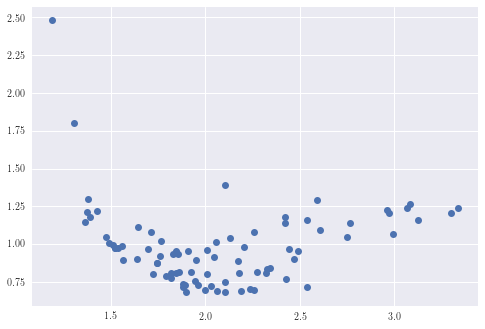

In [194]:
# sns.jointplot(np.log10(nu_b), np.log10(nu_k), kind='kde')
plt.plot(b_b, nu_k/nu_b, 'o')
# plt.xlim(1,3)
# sns.distplot(np.log10(nu_k[b_r2_b>0.9]), label='kirchner')
# sns.distplot(np.log10(nu_b[b_r2_b>0.9]), label='botter')
# sns.jointplot(b_b[b_r2_b>0.9], nu_b[b_r2_b>0.9]/nu_k[b_r2_b>0.9])
# plt.ylim(0,8)
# print(b_r2_b.sum(), b_r2_k.sum())
# for ii in range(28):
#     plt.loglog([mu_k[ii],mu_b[ii]], [nu_k[ii], nu_b[ii]], 'ko-', alpha=0.5)
#     plt.loglog(mu_b[ii], nu_b[ii], 'go')
# plt.loglog(mu_k, mu, 'ro')
# plt.loglog(mu_b, mu, 'go')